Q-learning for policyII

In [1]:
import numpy as np
import random
from random import sample
import math 
import matplotlib.pyplot as plt

In [2]:
def reset1():
    st= [0]*2
    return tuple(st)

In [3]:
weibull_scale=(2365.08,996.88,713.55,1406.84,343.76,3933.12,828.19,2040.95)
weibull_shape=(414.16,109.25,79.81,115.21,169.81,143.60,43.83,296.48)
tf=(2,6.5,2.5,6,5,3.5,3,3.5)
tp=(0.4,5.42,0.625,0.857,1.25,0.7,0.429,0.875)
time_interval=5
running_time=100000

optimal replacement time for tire

In [4]:
def step0(action,st): 
    
    f = random.weibullvariate(weibull_scale[0],weibull_shape[0])
    if action == 0 :
        st[0] +=5 #age 
        
        if f <= st[0]:
            st[1]=1    
        else:
            st[1]=0 
    
    if action ==1 :
            st[0]=0
            st[1]=0
           
    return tuple(st)
                

In [5]:
def rewardfun0(action,st) :
    reward =[]

    if action ==1 :
        reward= -(time_interval / tp[0])*tp[0] 
        
    if (st[1]==1 and action == 0):
        reward= -(time_interval / tp[0])*time_interval * math.ceil(tf[0]/time_interval)
    
    if (st[1]==0 and action == 0):
        reward = 5
    return reward
    

In [6]:
num_episodes=1000
min_lr=0.1 
min_epsilon=0.1
discount=0.9
decay=25

In [8]:
def choose_action(epsilon, state):
    if (state[1]==1):
        return 1
    else:
        if (np.random.random() < epsilon):
            return random.choice([0,1]) 
        else:
            return np.argmax(Q_table[state])
            

In [19]:
def get_epsilon( t):
    
    """Gets value for epsilon. It declines as we advance in episodes."""
    # Ensures that there's almost at least a min_epsilon chance of randomly exploring
    return max(min_epsilon, min(1., 1. - math.log10((t + 1) / decay)))

def get_learning_rate( t):
    
    """Gets value for learning rate. It declines as we advance in episodes."""
    # Learning rate also declines as we add more episodes
    return max(min_lr, min(1., 1. - math.log10((t + 1) / decay)))


In [58]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs = step0(action , list(current_state))
        reward = rewardfun0(action,current_state)
        rewards.append(reward)
        new_state = obs
        # Update Q(S,A)
        Q_table[current_state][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_state]) 
                                         - Q_table[current_state][action]))
        current_state = new_state
    
    scores.append(sum(rewards))


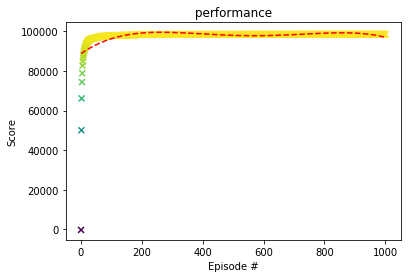

In [59]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance ')
plt.show()
     

In [60]:
optimal =[]
current_state = reset1()

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[current_state])
    if action==1:
        optimal.append(current_state)
    # Take action
    obs = step0(action , list(current_state))
    reward = rewardfun0(action,current_state)
    current_state = obs
np.unique(optimal)[1]

760

optimal replacement time for transmission

In [30]:
def step1(action,st): 
    
    f = random.weibullvariate(weibull_scale[1],weibull_shape[1])
    if action == 0 :
        st[0] +=5 #age 
        
        if f <= st[0]:
            st[1]=1    
        else:
            st[1]=0 
    
    if action ==1 :
            st[0]=0
            st[1]=0
           
    return tuple(st)
                

In [37]:
def rewardfun1(action,st) :
    reward =[]

    if action ==1 :
        reward= -(time_interval / tp[1])*tp[1] 
        
    if (st[1]==1 and action == 0):
        reward= -(time_interval / tp[1])*time_interval * math.ceil(tf[1]/time_interval)
    
    if (st[1]==0 and action == 0):
        reward = 5
    return reward
    

In [44]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs = step1(action , list(current_state))
        reward = rewardfun1(action,current_state)
        rewards.append(reward)
        new_state = obs
        # Update Q(S,A)
        Q_table[current_state][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_state]) 
                                         - Q_table[current_state][action]))
        current_state = new_state
    
    scores.append(sum(rewards))


In [45]:
optimal =[]
current_state = reset1()

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[current_state])
    if action==1:
        optimal.append(current_state)
    # Take action
    obs = step1(action , list(current_state))
    reward = rewardfun1(action,current_state)
    current_state = obs
np.unique(optimal)[1]

845

optimal replacement time for wheel rim

In [31]:
def step2(action,st): 
    
    f = random.weibullvariate(weibull_scale[2],weibull_shape[2])
    if action == 0 :
        st[0] +=5 #age 
        
        if f <= st[0]:
            st[1]=1    
        else:
            st[1]=0 
    
    if action ==1 :
            st[0]=0
            st[1]=0
           
    return tuple(st)
                

In [38]:
def rewardfun2(action,st) :
    reward =[]

    if action ==1 :
        reward= -(time_interval / tp[2])*tp[2] 
        
    if (st[1]==1 and action == 0):
        reward= -(time_interval / tp[2])*time_interval * math.ceil(tf[2]/time_interval)
    
    if (st[1]==0 and action == 0):
        reward = 5
    return reward
    

In [46]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs = step2(action , list(current_state))
        reward = rewardfun2(action,current_state)
        rewards.append(reward)
        new_state = obs
        # Update Q(S,A)
        Q_table[current_state][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_state]) 
                                         - Q_table[current_state][action]))
        current_state = new_state
    
    scores.append(sum(rewards))


In [47]:
optimal =[]
current_state = reset1()

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[current_state])
    if action==1:
        optimal.append(current_state)
    # Take action
    obs = step2(action , list(current_state))
    reward = rewardfun2(action,current_state)
    current_state = obs
np.unique(optimal)[1]

660

optimal replacement time for coupling

In [32]:
def step3(action,st): 
    
    f = random.weibullvariate(weibull_scale[3],weibull_shape[3])
    if action == 0 :
        st[0] +=5 #age 
        
        if f <= st[0]:
            st[1]=1    
        else:
            st[1]=0 
    
    if action ==1 :
            st[0]=0
            st[1]=0
           
    return tuple(st)
                

In [39]:
def rewardfun3(action,st) :
    reward =[]

    if action ==1 :
        reward= -(time_interval / tp[3])*tp[3] 
        
    if (st[1]==1 and action == 0):
        reward= -(time_interval / tp[3])*time_interval * math.ceil(tf[3]/time_interval)
    
    if (st[1]==0 and action == 0):
        reward = 5
    return reward
    

In [48]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs = step3(action , list(current_state))
        reward = rewardfun3(action,current_state)
        rewards.append(reward)
        new_state = obs
        # Update Q(S,A)
        Q_table[current_state][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_state]) 
                                         - Q_table[current_state][action]))
        current_state = new_state
    
    scores.append(sum(rewards))


In [49]:
optimal =[]
current_state = reset1()

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[current_state])
    if action==1:
        optimal.append(current_state)
    # Take action
    obs = step4(action , list(current_state))
    reward = rewardfun4(action,current_state)
    current_state = obs
np.unique(optimal)[1]

1315

optimal replacement time for motor

In [33]:
def step4(action,st): 
    
    f = random.weibullvariate(weibull_scale[4],weibull_shape[4])
    if action == 0 :
        st[0] +=5 #age 
        
        if f <= st[0]:
            st[1]=1    
        else:
            st[1]=0 
    
    if action ==1 :
            st[0]=0
            st[1]=0
           
    return tuple(st)
                

In [40]:
def rewardfun4(action,st) :
    reward =[]

    if action ==1 :
        reward= -(time_interval / tp[4])*tp[4] 
        
    if (st[1]==1 and action == 0):
        reward= -(time_interval / tp[4])*time_interval * math.ceil(tf[4]/time_interval)
    
    if (st[1]==0 and action == 0):
        reward = 5
    return reward
    

In [50]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs = step4(action , list(current_state))
        reward = rewardfun4(action,current_state)
        rewards.append(reward)
        new_state = obs
        # Update Q(S,A)
        Q_table[current_state][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_state]) 
                                         - Q_table[current_state][action]))
        current_state = new_state
    
    scores.append(sum(rewards))


In [51]:
optimal =[]
current_state = reset1()

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[current_state])
    if action==1:
        optimal.append(current_state)
    # Take action
    obs = step4(action , list(current_state))
    reward = rewardfun4(action,current_state)
    current_state = obs
np.unique(optimal)[1]

335

optimal replacement time for brake

In [34]:
def step5(action,st): 
    
    f = random.weibullvariate(weibull_scale[5],weibull_shape[5])
    if action == 0 :
        st[0] +=5 #age 
        
        if f <= st[0]:
            st[1]=1    
        else:
            st[1]=0 
    
    if action ==1 :
            st[0]=0
            st[1]=0
           
    return tuple(st)
                

In [41]:
def rewardfun5(action,st) :
    reward =[]

    if action ==1 :
        reward= -(time_interval / tp[5])*tp[5] 
        
    if (st[1]==1 and action == 0):
        reward= -(time_interval / tp[5])*time_interval * math.ceil(tf[5]/time_interval)
    
    if (st[1]==0 and action == 0):
        reward = 5
    return reward
    

In [52]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs = step5(action , list(current_state))
        reward = rewardfun5(action,current_state)
        rewards.append(reward)
        new_state = obs
        # Update Q(S,A)
        Q_table[current_state][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_state]) 
                                         - Q_table[current_state][action]))
        current_state = new_state
    
    scores.append(sum(rewards))


In [53]:
optimal =[]
current_state = reset1()

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[current_state])
    if action==1:
        optimal.append(current_state)
    # Take action
    obs = step5(action , list(current_state))
    reward = rewardfun5(action,current_state)
    current_state = obs
np.unique(optimal)[1]

745

optimal replacement time for steering wheel

In [35]:
def step6(action,st): 
    
    f = random.weibullvariate(weibull_scale[6],weibull_shape[6])
    if action == 0 :
        st[0] +=5 #age 
        
        if f <= st[0]:
            st[1]=1    
        else:
            st[1]=0 
    
    if action ==1 :
            st[0]=0
            st[1]=0
           
    return tuple(st)
                

In [42]:
def rewardfun6(action,st) :
    reward =[]

    if action ==1 :
        reward= -(time_interval / tp[6])*tp[6] 
        
    if (st[1]==1 and action == 0):
        reward= -(time_interval / tp[6])*time_interval * math.ceil(tf[6]/time_interval)
    
    if (st[1]==0 and action == 0):
        reward = 5
    return reward
    

In [54]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs = step6(action , list(current_state))
        reward = rewardfun6(action,current_state)
        rewards.append(reward)
        new_state = obs
        # Update Q(S,A)
        Q_table[current_state][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_state]) 
                                         - Q_table[current_state][action]))
        current_state = new_state
    
    scores.append(sum(rewards))


In [55]:
optimal =[]
current_state = reset1()

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[current_state])
    if action==1:
        optimal.append(current_state)
    # Take action
    obs = step6(action , list(current_state))
    reward = rewardfun6(action,current_state)
    current_state = obs
np.unique(optimal)[1]

715

optimal replacement time for shifting gears

In [36]:
def step7(action,st): 
    
    f = random.weibullvariate(weibull_scale[7],weibull_shape[7])
    if action == 0 :
        st[0] +=5 #age 
        
        if f <= st[0]:
            st[1]=1    
        else:
            st[1]=0 
    
    if action ==1 :
            st[0]=0
            st[1]=0
           
    return tuple(st)
                

In [43]:
def rewardfun7(action,st) :
    reward =[]

    if action ==1 :
        reward= -(time_interval / tp[7])*tp[7] 
        
    if (st[1]==1 and action == 0):
        reward= -(time_interval / tp[7])*time_interval * math.ceil(tf[7]/time_interval)
    
    if (st[1]==0 and action == 0):
        reward = 5
    return reward
    

In [56]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs = step7(action , list(current_state))
        reward = rewardfun7(action,current_state)
        rewards.append(reward)
        new_state = obs
        # Update Q(S,A)
        Q_table[current_state][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_state]) 
                                         - Q_table[current_state][action]))
        current_state = new_state
    
    scores.append(sum(rewards))


In [57]:
optimal =[]
current_state = reset1()

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[current_state])
    if action==1:
        optimal.append(current_state)
    # Take action
    obs = step7(action , list(current_state))
    reward = rewardfun7(action,current_state)
    current_state = obs
np.unique(optimal)[1]

1055